## 0. Problem Setup 

Your friend has a coffee shop. The goal is to look at their sales data and be able to make some recomendations on what items they should stock going forward, or which days they're most profitable. 


They track sales data as follows:
- sales in a './data/coffee-shop-sales.csv' 
- prices and unit costs in './data/coffee-shop-prices.csv'
- each line in the sales spreadsheet represents the sale of a single item

Load the data and explore what's there. Think about what recommendations you may make to your friend based on what you see in the data. 

In [1]:
# import pandas 
import pandas as pd 

In [2]:
# read the files with the store data 
sales = pd.read_csv("./data/coffee-shop-sales.csv")
prices = pd.read_csv("./data/coffee-shop-prices.csv")

In [3]:
# take a look at the data prices
prices

,Item,UnitPrice,UnitCost
0,Muffin,$3,$0.50
1,Chocolate Bar,$1.50,$0.75
2,Banana,$0.35,$0.30
3,Mug,$12,$0.80
4,Cookies,$2.45,$1.50
5,Instant Coffee,$8.99,$3.00
6,Ground Coffee,$15.99,$10
7,Whole Bean Coffee,$16.99,$9


In [4]:
# take a look at the data sales
sales

,Date,Item
0,8/2/22,Banana
1,8/3/22,Banana
2,8/4/22,Banana
3,8/5/22,Banana
4,8/6/22,Banana
...,...,...
85,8/6/22,Cookies
86,8/7/22,Cookies
87,8/8/22,Cookies
88,8/9/22,Cookies


## 1. Sales Data by Item
First, we'll take a look at what items sold, how much profit was made from each item. 

### 1.1. Transform the Raw Data  

For this section, you'll focus on sales per item - what sells the most and generates the most profit. 

In [5]:
# create a grouped DF with a new column that tracks the total number of each item sold 
# hint: https://stackoverflow.com/questions/48770035/adding-a-count-column-to-the-result-of-a-groupby-in-pandas

sales_summary_df = sales.groupby(['Item']).Date.agg('count').to_frame('NumSold')
sales_summary_df

,NumSold
Item,
Banana,13
Chocolate Bar,8
Cookies,27
Ground Coffee,13
Muffin,19
Mug,2
Whole Bean Coffee,8


In [6]:
# create a copy of the prices DF
profits_df = prices.copy()

# add a sales quantity column and fill it with values from the grouped DF above 
# hint: https://www.statology.org/left-join-pandas/
profits_df = profits_df.merge(sales_summary_df, on='Item', how='left')

profits_df

,Item,UnitPrice,UnitCost,NumSold
0,Muffin,$3,$0.50,19.0
1,Chocolate Bar,$1.50,$0.75,8.0
2,Banana,$0.35,$0.30,13.0
3,Mug,$12,$0.80,2.0
4,Cookies,$2.45,$1.50,27.0
5,Instant Coffee,$8.99,$3.00,NaN
6,Ground Coffee,$15.99,$10,13.0
7,Whole Bean Coffee,$16.99,$9,8.0


In [7]:
# add calculated columns for (1)total sold for each item and (2) prifit made from each item 

profits_df.UnitPrice = profits_df.UnitPrice.str.replace('$', '', regex=False).astype(float)
profits_df.UnitCost = profits_df.UnitCost.str.replace('$', '', regex=False).astype(float)

profits_df["SalesTotal"] = profits_df.UnitPrice * profits_df.NumSold
profits_df["ItemProfitTotal"] = (profits_df.UnitPrice - profits_df.UnitCost )* profits_df.NumSold

profits_df

,Item,UnitPrice,UnitCost,NumSold,SalesTotal,ItemProfitTotal
0,Muffin,3.00,0.50,19.0,57.00,47.50
1,Chocolate Bar,1.50,0.75,8.0,12.00,6.00
2,Banana,0.35,0.30,13.0,4.55,0.65
3,Mug,12.00,0.80,2.0,24.00,22.40
4,Cookies,2.45,1.50,27.0,66.15,25.65
5,Instant Coffee,8.99,3.00,NaN,NaN,NaN
6,Ground Coffee,15.99,10.00,13.0,207.87,77.87
7,Whole Bean Coffee,16.99,9.00,8.0,135.92,63.92


### 1.2. Visualize the transformed data

1. Create a figure with 1 horizontal bar chart showing quantity of sales for each item 
    - sort the item bars from least sold to most sold
2. Create a histogram of number of items sold. 

_(NOTE: compare what the histogram tells you about item sales vs. what the bar plot tells you. Is one more helpful than the other?)_

3. Create a figure with 2 graphs with a shared Y axis showing sales:
    - sort the item bars from most profitable to least profitable
    - vertical bar chart showing sales totals for each item 
    - vertical chart showing sales profits for each item

    **(BONUS Question: what piece of information do you see in these last 2 graphs that weren't apparent in the first 2 graphs? Why would this information be important if you were running an actual business?)**

Make it look nice: 
- Give each figure a descriptive title.
- Give each graph a descriptive title.
- Make sure that the only output shown is the plot, no additional text. 
- Make sure that the item labels aren't all garbled together. 

In [8]:
# import the necessary stuff to draw plots
import matplotlib.pyplot as plt
%matplotlib inline

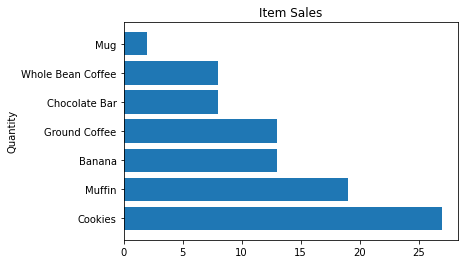

In [9]:
# Create a figure with 1 horizontal bar chart showing quantity of sales for each item 
# Sort the item bars from least sold to most sold
# Make it look nice

fig, ax = plt.subplots(figsize=(6,4))

profits_df = profits_df.sort_values(by="NumSold", ascending=False)
ax.barh(profits_df.Item, width=profits_df.NumSold)
ax.set(title="Item Sales",
         ylabel="Quantity");


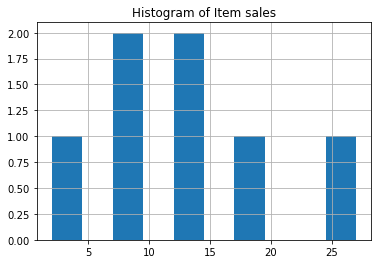

In [10]:
# draw the histogram with a nice title
profits_df.hist("NumSold")
plt.title("Histogram of Item sales");

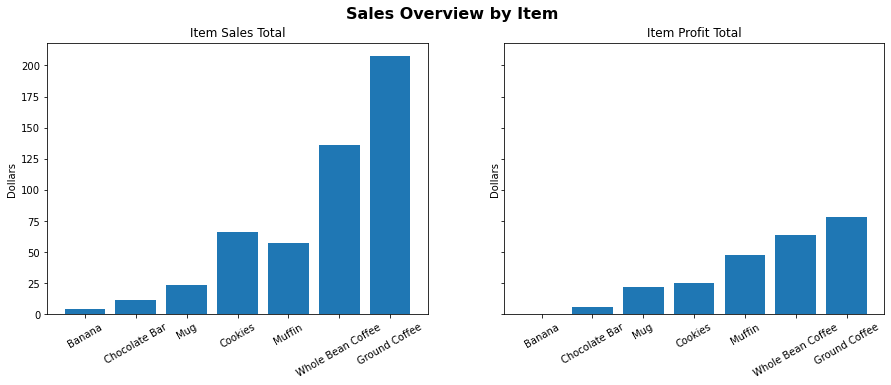

In [11]:
# Create a figure with 2 graphs with a shared Y axis showing sales:
#    - sort the item bars from most profitable to least profitable
#    - vertical bar chart showing sales totals for each item 
#    - vertical chart showing sales profits for each item
# Make it look nice :)

# hint: you may need this to make it look pretty:
# https://stackoverflow.com/questions/63340844/how-do-you-rotate-x-axis-labels-in-matplotlib-subplots

fig, ax = plt.subplots(figsize=(15,5), ncols=2, sharey=True)
fig.suptitle("Sales Overview by Item", fontsize=16, fontweight="bold")

profits_df = profits_df.sort_values(by="ItemProfitTotal", ascending=True)

ax[0].bar(profits_df.Item, profits_df.SalesTotal)
ax[0].set(title="Item Sales Total",
         ylabel="Dollars", 
         )
ax[0].tick_params(axis='x', rotation=30)


ax[1].bar(profits_df.Item, profits_df.ItemProfitTotal)
ax[1].set(title="Item Profit Total",
         ylabel="Dollars")
ax[1].tick_params(axis='x', rotation=30);



## 2. Sales Data as a Time Series


### 2.1. Transform the data. 

For this section, you will want to group your data by date and then calculate sales and profits per item per day. 

**Pro Tip:** Print out the dataframes after transforming them to ensure that you got the desired results from every operation.

In [12]:
# in the sales PD, transform the Date column to a datetime type
# create a grouped DF with a new column that tracks the total number of each item sold PER DAY
# sort your time series and save to a new sorted DF
# hint: you'll need to keep the date as a column in the resulting DF. example here: https://stackoverflow.com/questions/31569549/how-to-groupby-a-dataframe-in-pandas-and-keep-columns

sales.Date = pd.to_datetime(sales.Date)

sales_time_series_df = sales.sort_values(by='Date').groupby(['Date', 'Item']).Date.agg('count').to_frame('NumSold').reset_index()
sales_time_series_df.head(10)

,Date,Item,NumSold
0,2022-08-02,Banana,1
1,2022-08-02,Chocolate Bar,1
2,2022-08-02,Cookies,3
3,2022-08-02,Ground Coffee,1
4,2022-08-02,Muffin,2
5,2022-08-03,Banana,1
6,2022-08-03,Cookies,2
7,2022-08-03,Ground Coffee,1
8,2022-08-03,Muffin,2
9,2022-08-03,Whole Bean Coffee,1


In [13]:
# add a column with the week day for each of the sales dates 
# This isn't covered in Udemy until later; see documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html 

sales_time_series_df["DayOfWeek"] = sales_time_series_df.Date.dt.day_of_week

In [14]:
# Merge the new time series with the price information

sales_time_series_df = sales_time_series_df.merge(prices, on='Item', how='left')
sales_time_series_df

,Date,Item,NumSold,DayOfWeek,UnitPrice,UnitCost
0,2022-08-02,Banana,1,1,$0.35,$0.30
1,2022-08-02,Chocolate Bar,1,1,$1.50,$0.75
2,2022-08-02,Cookies,3,1,$2.45,$1.50
3,2022-08-02,Ground Coffee,1,1,$15.99,$10
4,2022-08-02,Muffin,2,1,$3,$0.50
5,2022-08-03,Banana,1,2,$0.35,$0.30
6,2022-08-03,Cookies,2,2,$2.45,$1.50
7,2022-08-03,Ground Coffee,1,2,$15.99,$10
8,2022-08-03,Muffin,2,2,$3,$0.50
9,2022-08-03,Whole Bean Coffee,1,2,$16.99,$9


In [15]:
# BONUS POINTS: you need to convert the currency to a float
# make a re-usable function to do this and lambdas to call your function to convert both currency columns
# hint: lambda examples here https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/


def currency_to_float(currencyString):
    cleaned_str = currencyString.replace('$', '')
    return float(cleaned_str)

sales_time_series_df.UnitPrice = sales_time_series_df.UnitPrice.apply(lambda x: currency_to_float(x))
sales_time_series_df.UnitCost = sales_time_series_df.UnitCost.apply(lambda x: currency_to_float(x))

sales_time_series_df


,Date,Item,NumSold,DayOfWeek,UnitPrice,UnitCost
0,2022-08-02,Banana,1,1,0.35,0.30
1,2022-08-02,Chocolate Bar,1,1,1.50,0.75
2,2022-08-02,Cookies,3,1,2.45,1.50
3,2022-08-02,Ground Coffee,1,1,15.99,10.00
4,2022-08-02,Muffin,2,1,3.00,0.50
5,2022-08-03,Banana,1,2,0.35,0.30
6,2022-08-03,Cookies,2,2,2.45,1.50
7,2022-08-03,Ground Coffee,1,2,15.99,10.00
8,2022-08-03,Muffin,2,2,3.00,0.50
9,2022-08-03,Whole Bean Coffee,1,2,16.99,9.00


In [16]:
# Calculate the total sales and total profits for each day 
# by adding the cost and price columns from Prices and then creating new calculated columns.

sales_time_series_df["ItemSalesTotal"] = sales_time_series_df.UnitPrice * sales_time_series_df.NumSold
sales_time_series_df["ItemProfitTotal"] = (sales_time_series_df.UnitPrice - sales_time_series_df.UnitCost )* sales_time_series_df.NumSold

sales_time_series_df

,Date,Item,NumSold,DayOfWeek,UnitPrice,UnitCost,ItemSalesTotal,ItemProfitTotal
0,2022-08-02,Banana,1,1,0.35,0.30,0.35,0.05
1,2022-08-02,Chocolate Bar,1,1,1.50,0.75,1.50,0.75
2,2022-08-02,Cookies,3,1,2.45,1.50,7.35,2.85
3,2022-08-02,Ground Coffee,1,1,15.99,10.00,15.99,5.99
4,2022-08-02,Muffin,2,1,3.00,0.50,6.00,5.00
5,2022-08-03,Banana,1,2,0.35,0.30,0.35,0.05
6,2022-08-03,Cookies,2,2,2.45,1.50,4.90,1.90
7,2022-08-03,Ground Coffee,1,2,15.99,10.00,15.99,5.99
8,2022-08-03,Muffin,2,2,3.00,0.50,6.00,5.00
9,2022-08-03,Whole Bean Coffee,1,2,16.99,9.00,16.99,7.99


### 2. Visualize the transformed data
1. Create a figure with 2 time series:
    - Day's sales total
    - Day's profit total

2. Create a chart that shows the average(mean) profit and net sales for each day of the week. 

Make it look nice: 
- Give each figure a descriptive title.
- Give each graph a descriptive title.
- Make sure that the only output shown is the plot, no additional text. 
- Make sure that the item labels aren't all garbled together. 

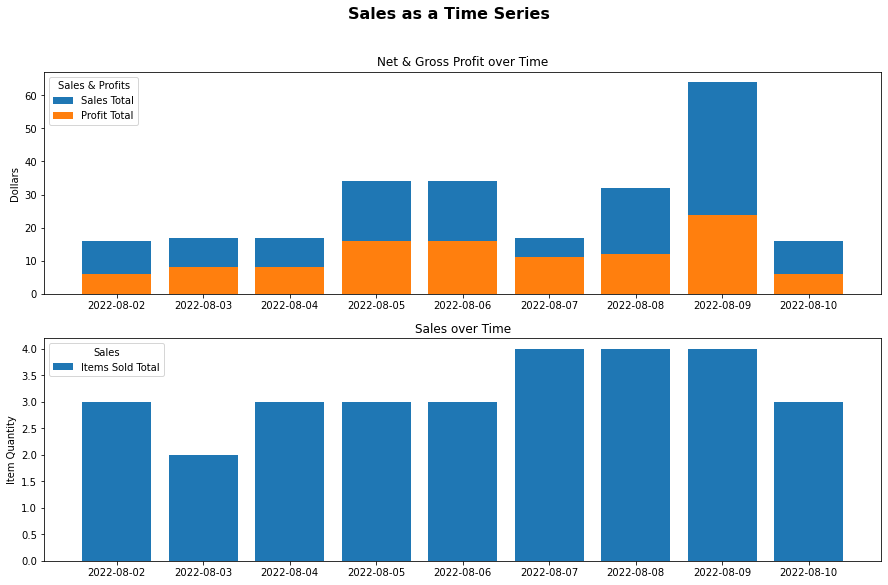

In [17]:
# Create a figure with 2 time series:
#     - Day's sales total
#     - Day's profit total

# set up the plor area and title
fig, ax = plt.subplots(figsize=(15,9), nrows=2)
fig.suptitle("Sales as a Time Series", fontsize=16, fontweight="bold")

# set graph title and y label. Dates should be on the x axis
ax[0].set(title="Net & Gross Profit over Time",
         ylabel="Dollars")

# add bars for sales
ax[0].bar(sales_time_series_df.Date, sales_time_series_df.ItemSalesTotal, label="Sales Total")
# add bars for profits
ax[0].bar(sales_time_series_df.Date, sales_time_series_df.ItemProfitTotal, label="Profit Total")

#add a legend
ax[0].legend(title="Sales & Profits", loc="upper left")


# set graph title and y label. Dates should be on the x axis
ax[1].set(title="Sales over Time",
         ylabel="Item Quantity")

# add bars for sales
ax[1].bar(sales_time_series_df.Date, sales_time_series_df.NumSold, label="Items Sold Total")

#add a legend
ax[1].legend(title="Sales", loc="upper left")

plt.tight_layout;



Look at the last 2 charts. Are there days when profits per item were better than others? What would you recommend to the business based on what you see here?

In [30]:
# Create a chart that shows the average(mean) profit and net sales for each day of the week. 

# first you need to calculate the week day averages. 
# hint: https://www.statology.org/pandas-mean-by-group/

day_means = sales_time_series_df.groupby('DayOfWeek')['ItemSalesTotal', 'ItemProfitTotal'].mean().reset_index()
day_means

/var/folders/2s/34bjwxks31d_3b2pkrqn680c0000gn/T/ipykernel_49592/2897074571.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_means = sales_time_series_df.groupby('DayOfWeek')['ItemSalesTotal', 'ItemProfitTotal'].mean().reset_index()


,DayOfWeek,ItemSalesTotal,ItemProfitTotal
0,0,11.411667,5.061667
1,1,12.365000,5.870000
2,2,7.918889,3.596667
3,3,9.446000,4.686000
4,4,13.618333,6.360000
5,5,10.136000,5.076000
6,6,9.211429,5.082857


/var/folders/2s/34bjwxks31d_3b2pkrqn680c0000gn/T/ipykernel_49592/673289387.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']) ;


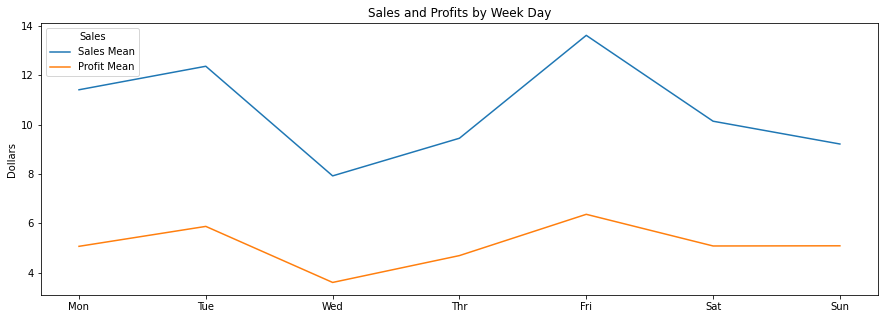

In [38]:

# Plot the averages as lines on a single plot
# Replace week day numbers with names: 0 = Sunday, 1=Monday, etc. 

# set up the plor area and title
fig, ax = plt.subplots(figsize=(15,5))

# set graph title and y label. Week days should be on the x axis
ax.set(title="Sales and Profits by Week Day",
         ylabel="Dollars")

# add line for mean sales
ax.plot(day_means.DayOfWeek, day_means.ItemSalesTotal, label="Sales Mean")
# add line for mean profits
ax.plot(day_means.DayOfWeek, day_means.ItemProfitTotal, label="Profit Mean")

#add a legend
ax.legend(title="Sales", loc="upper left")

# replace numbers with day names on the X axis
# you may get a warning... ignore it
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']) ;